In [1]:
import pandas as pd
import mysql.connector
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Connect to MySQL
conn = mysql.connector.connect(
    host='localhost',     
    user='root', 
    password='#MYSql@1', 
    database='SQL_PROJECT'
)

In [3]:
# Write a SQL query to fetch the data
query = "SELECT * FROM enrollee_data;"

# Load the data into a pandas DataFrame
df = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Display the first few rows of the DataFrame
df.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_18360\3017655883.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,1,50-99,Pvt Ltd,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,5,47,0
2,11561,city_21,0.624,Not Known,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,0,83,0
3,33241,city_115,0.789,Not Known,No relevent experience,Not Known,Graduate,Business Degree,1,50-99,Pvt Ltd,0,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,1,50-99,Funded Startup,4,8,0


In [4]:
df.shape

(38316, 14)

In [5]:
df.size

536424

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38316 entries, 0 to 38315
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             38316 non-null  int64  
 1   city                    38316 non-null  object 
 2   city_development_index  38316 non-null  float64
 3   gender                  38316 non-null  object 
 4   relevent_experience     38316 non-null  object 
 5   enrolled_university     38316 non-null  object 
 6   education_level         38316 non-null  object 
 7   major_discipline        38316 non-null  object 
 8   experience              38316 non-null  object 
 9   company_size            38316 non-null  object 
 10  company_type            38316 non-null  object 
 11  last_new_job            38316 non-null  object 
 12  training_hours          38316 non-null  int64  
 13  target                  38316 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [7]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,38316.000000,38316.000000,38316.000000,38316.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.167101,0.123360,60.057678,0.432641
min,1.000000,0.448000,1.000000,0.000000
25%,8554.000000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25170.000000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [8]:
df.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [9]:
df.nunique()

enrollee_id               19158
city                        123
city_development_index       93
gender                        4
relevent_experience           2
enrolled_university           4
education_level               6
major_discipline              7
experience                   20
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

In [10]:
# Group by 'education_level' and 'target' and count occurrences
education_target_counts = df.groupby([ 'education_level','target']).size().reset_index(name='count')

# Display the result
print(education_target_counts)

   education_level  target  count
0         Graduate       0  16706
1         Graduate       1   6490
2      High School       0   3246
3      High School       1    788
4          Masters       0   6852
5          Masters       1   1870
6        Not Known       0    712
7        Not Known       1    208
8              Phd       0    712
9              Phd       1    116
10  Primary School       0    534
11  Primary School       1     82


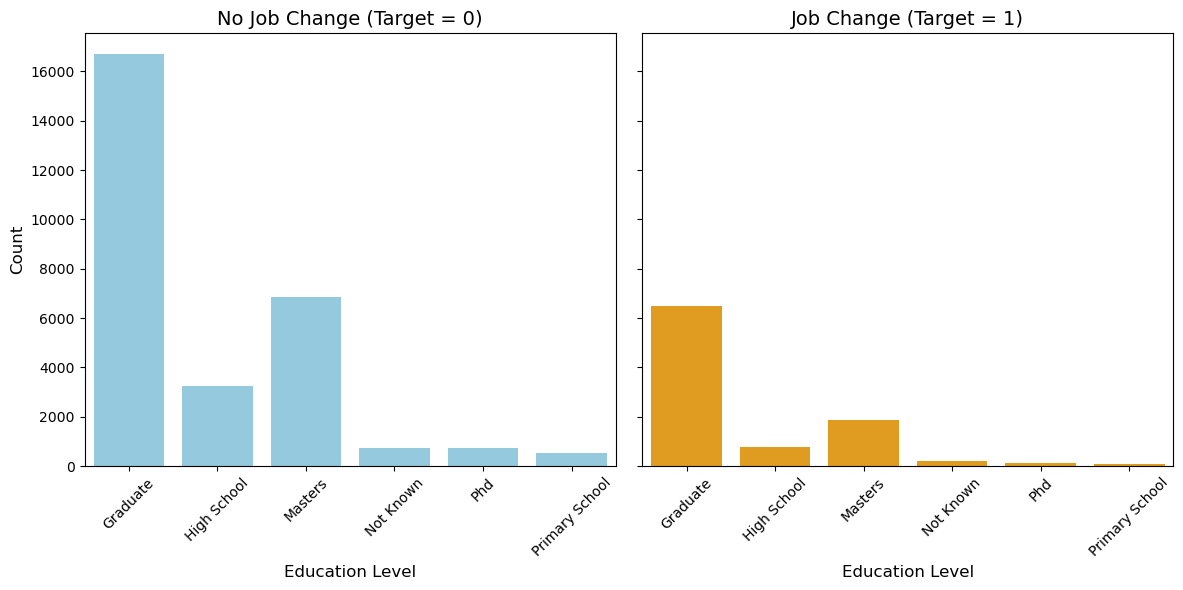

In [11]:
# Separate data for each target value
target_0 = education_target_counts[education_target_counts['target'] == 0]
target_1 = education_target_counts[education_target_counts['target'] == 1]

# Set up the figure and axes for side-by-side vertical bar charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot for target 0 (No Job Change)
sns.barplot(x='education_level', y='count', data=target_0, ax=axes[0], color='skyblue')
axes[0].set_title('No Job Change (Target = 0)', fontsize=14)
axes[0].set_xlabel('Education Level', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Plot for target 1 (Job Change)
sns.barplot(x='education_level', y='count', data=target_1, ax=axes[1], color='orange')
axes[1].set_title('Job Change (Target = 1)', fontsize=14)
axes[1].set_xlabel('Education Level', fontsize=12)
axes[1].set_ylabel('')  # No need to label again since sharey=True
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

In [12]:
# Group by 'enrolled_university' and 'target' and count occurrences
university_target_counts = df.groupby([ 'enrolled_university','target']).size().reset_index(name='count')

# Display the result
print(university_target_counts)

  enrolled_university  target  count
0    Full time course       0   4652
1    Full time course       1   2862
2           Not Known       0    526
3           Not Known       1    246
4    Part time course       0   1792
5    Part time course       1    604
6       no_enrollment       0  21792
7       no_enrollment       1   5842


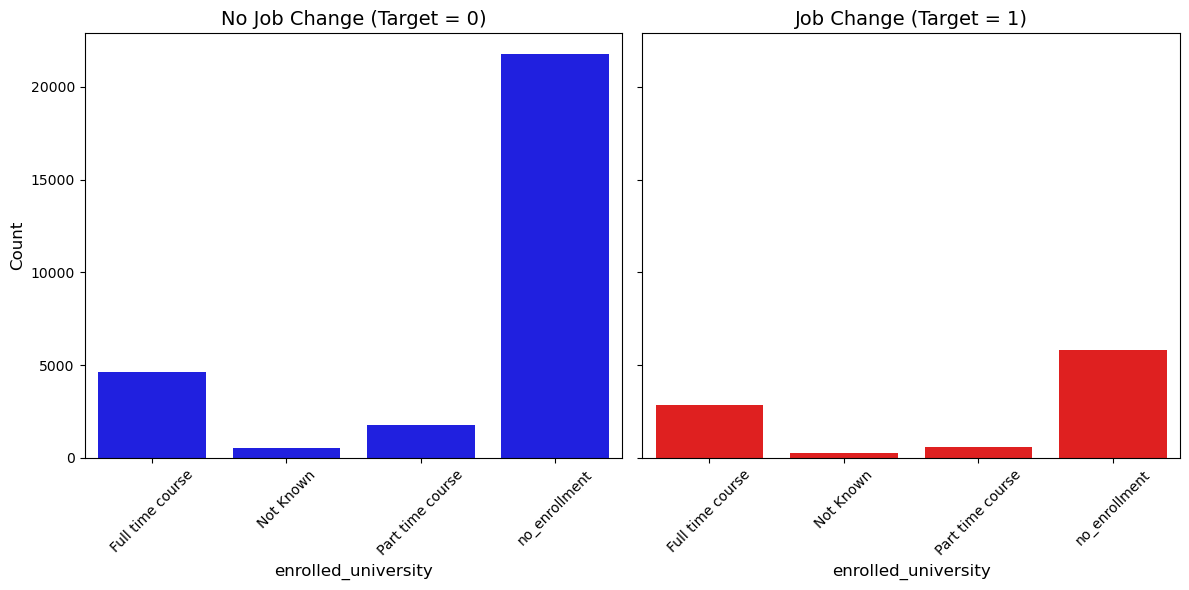

In [13]:
# Separate data for each target value
target_0 = university_target_counts[university_target_counts['target'] == 0]
target_1 = university_target_counts[university_target_counts['target'] == 1]

# Set up the figure and axes for side-by-side vertical bar charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot for target 0 (No Job Change)
sns.barplot(x='enrolled_university', y='count', data=target_0, ax=axes[0], color='blue')
axes[0].set_title('No Job Change (Target = 0)', fontsize=14)
axes[0].set_xlabel('enrolled_university', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Plot for target 1 (Job Change)
sns.barplot(x='enrolled_university', y='count', data=target_1, ax=axes[1], color='red')
axes[1].set_title('Job Change (Target = 1)', fontsize=14)
axes[1].set_xlabel('enrolled_university', fontsize=12)
axes[1].set_ylabel('')  # No need to label again since sharey=True
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

In [14]:
# Group by 'gender' and 'target' and count occurrences
gender_target_counts = df.groupby([ 'gender','target']).size().reset_index(name='count')

# Display the result
print(gender_target_counts)

      gender  target  count
0     Female       0   1824
1     Female       1    652
2       Male       0  20418
3       Male       1   6024
4  Not Known       0   6238
5  Not Known       1   2778
6      Other       0    282
7      Other       1    100


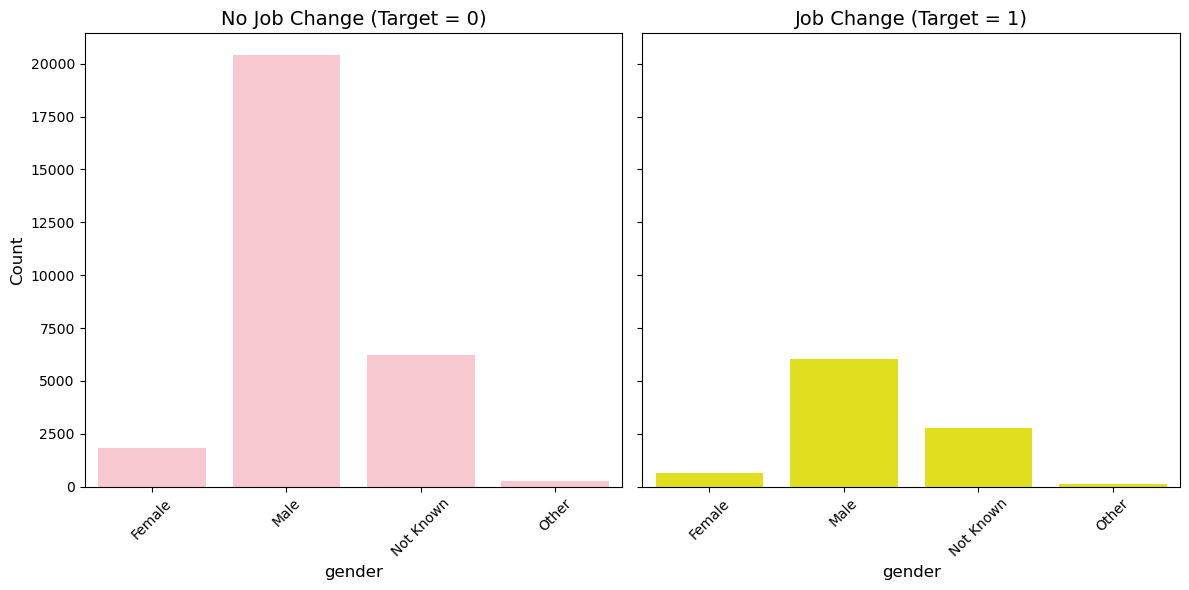

In [15]:
# Separate data for each target value
target_0 = gender_target_counts[gender_target_counts['target'] == 0]
target_1 = gender_target_counts[gender_target_counts['target'] == 1]

# Set up the figure and axes for side-by-side vertical bar charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot for target 0 (No Job Change)
sns.barplot(x='gender', y='count', data=target_0, ax=axes[0], color='pink')
axes[0].set_title('No Job Change (Target = 0)', fontsize=14)
axes[0].set_xlabel('gender', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Plot for target 1 (Job Change)
sns.barplot(x='gender', y='count', data=target_1, ax=axes[1], color='yellow')
axes[1].set_title('Job Change (Target = 1)', fontsize=14)
axes[1].set_xlabel('gender', fontsize=12)
axes[1].set_ylabel('')  # No need to label again since sharey=True
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

In [16]:
# Group by 'major discipline' and 'target' and count occurrences
major_discipline_target_counts = df.groupby([ 'major_discipline','target']).size().reset_index(name='count')

# Display the result
print(major_discipline_target_counts)


   major_discipline  target  count
0              Arts       0    400
1              Arts       1    106
2   Business Degree       0    482
3   Business Degree       1    172
4        Humanities       0   1056
5        Humanities       1    282
6          No Major       0    336
7          No Major       1    110
8         Not Known       0   4528
9         Not Known       1   1098
10            Other       0    558
11            Other       1    204
12             STEM       0  21402
13             STEM       1   7582


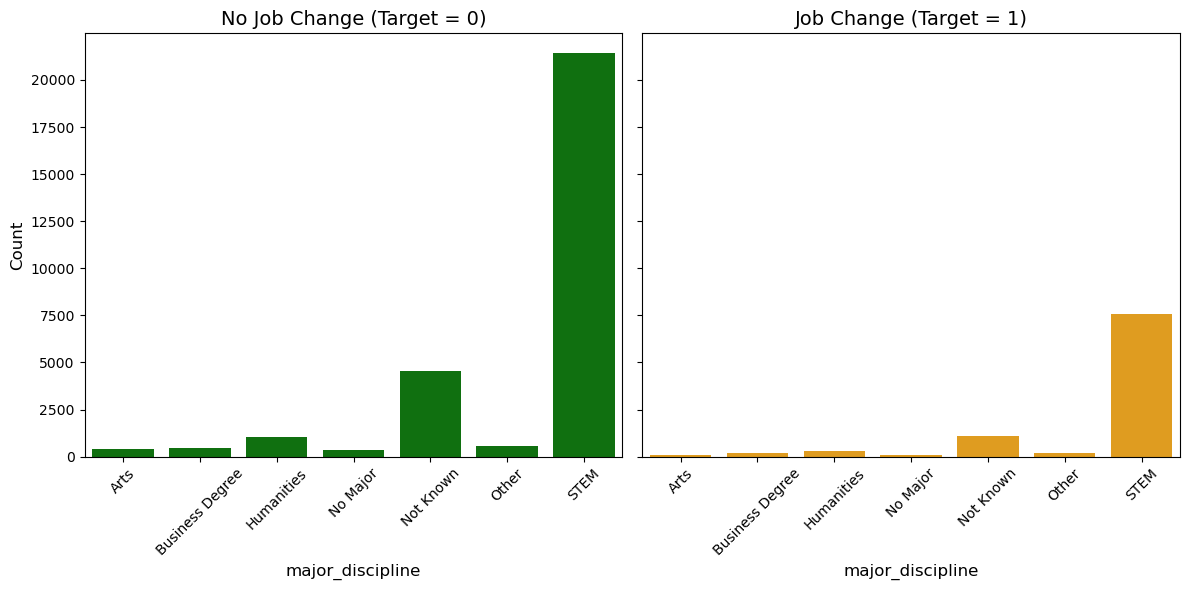

In [17]:
# Separate data for each target value
target_0 = major_discipline_target_counts[major_discipline_target_counts['target'] == 0]
target_1 = major_discipline_target_counts[major_discipline_target_counts['target'] == 1]

# Set up the figure and axes for side-by-side vertical bar charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot for target 0 (No Job Change)
sns.barplot(x='major_discipline', y='count', data=target_0, ax=axes[0], color='green')
axes[0].set_title('No Job Change (Target = 0)', fontsize=14)
axes[0].set_xlabel('major_discipline', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Plot for target 1 (Job Change)
sns.barplot(x='major_discipline', y='count', data=target_1, ax=axes[1], color='orange')
axes[1].set_title('Job Change (Target = 1)', fontsize=14)
axes[1].set_xlabel('major_discipline', fontsize=12)
axes[1].set_ylabel('')  # No need to label again since sharey=True
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

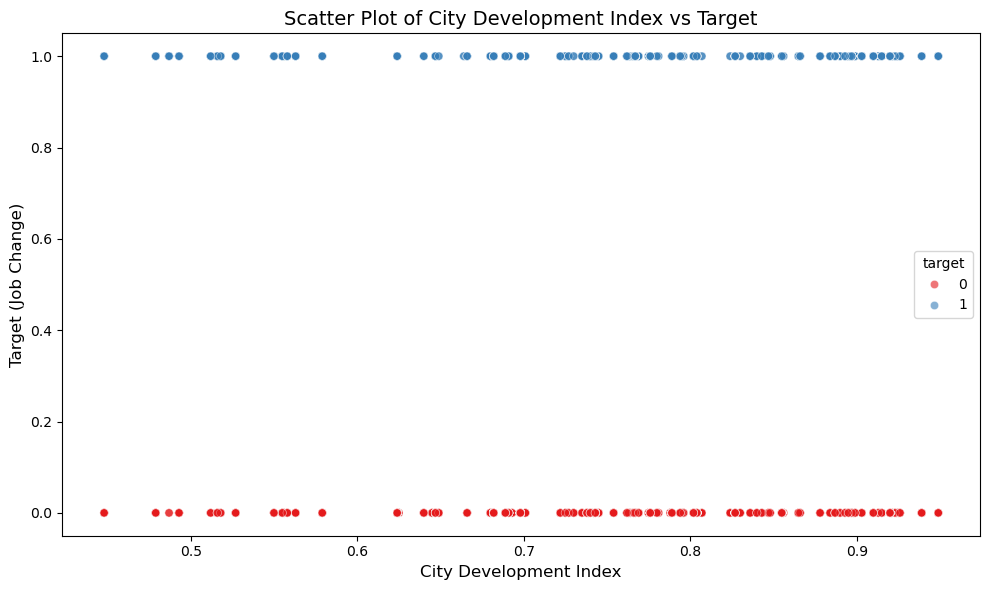

In [18]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='city_development_index', y='target', data=df, hue='target', palette='Set1', alpha=0.6)

# Add title and labels
plt.title('Scatter Plot of City Development Index vs Target', fontsize=14)
plt.xlabel('City Development Index', fontsize=12)
plt.ylabel('Target (Job Change)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


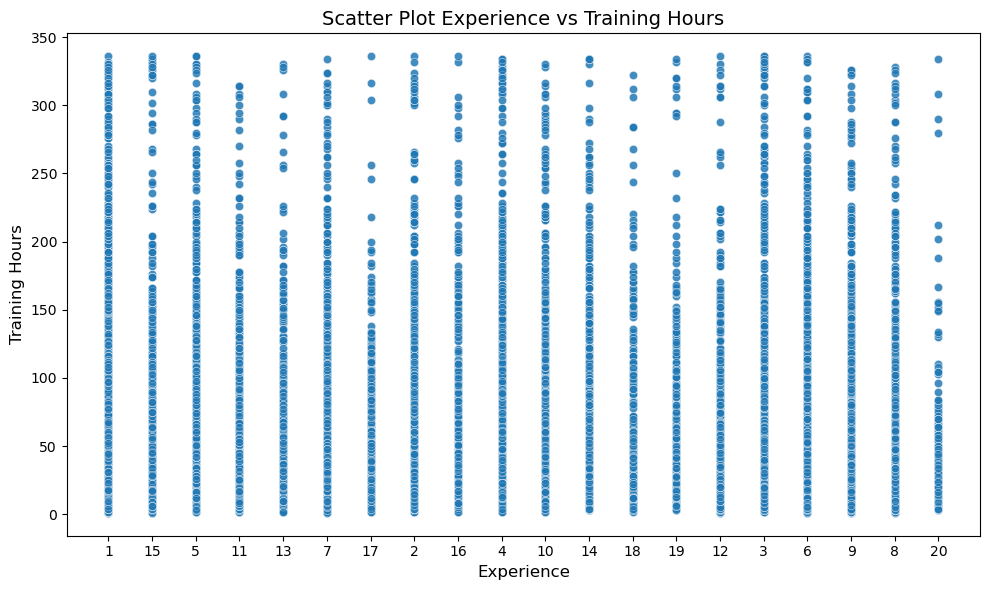

In [19]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='experience', y='training_hours', data=df, alpha=0.6)

# Add title and labels
plt.title('Scatter Plot Experience vs Training Hours', fontsize=14)
plt.xlabel('Experience', fontsize=12)
plt.ylabel('Training Hours', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


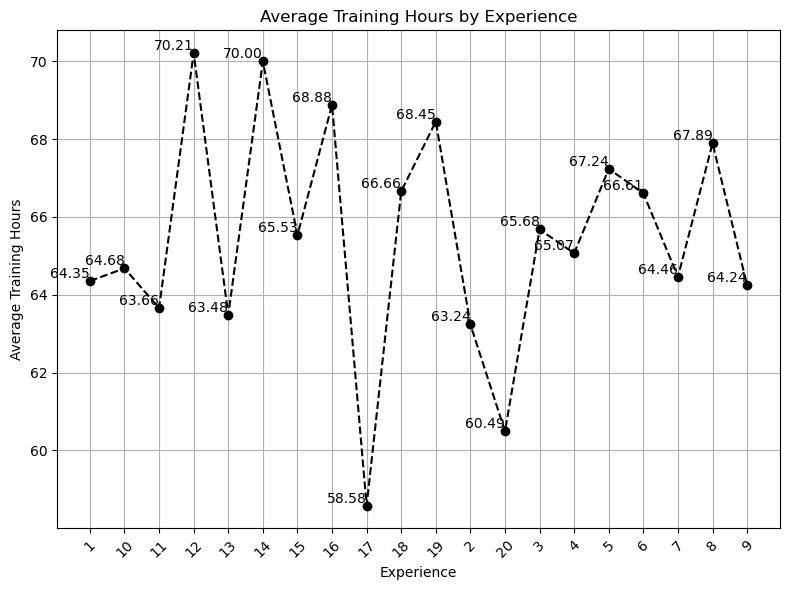

In [20]:
# Group by experience  and calculate the mean of training_hours for each level
experience_training_hours = df.groupby('experience')['training_hours'].mean()

# Plotting the bar chart
plt.figure(figsize=(8,6))
plt.plot(experience_training_hours.index, experience_training_hours.values, color = 'black',marker = 'o',linestyle='dashed')

# Annotate each marker with its value
#enumerate - iterate through each value
#plt.text = to place value near each marker
#experience_training_hours.index[i] and value specify the position of the text.
#f'{value:.2f}' formats the value to two decimal places.
#fontsize=12 sets the font size.
#ha='right' and va='bottom' set horizontal and vertical alignment, respectively.
for i, value in enumerate(experience_training_hours.values):
    plt.text(experience_training_hours.index[i], value, f'{value:.2f}', fontsize=10, ha='right', va='bottom')
    
# Add labels and title
plt.xlabel('Experience')
plt.ylabel('Average Training Hours')
plt.title('Average Training Hours by Experience')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the chart
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
num_feat=df.iloc[:,:-1].select_dtypes("number").columns
cat_feat=df.select_dtypes("object").columns
print(num_feat)
print('--------------------------------------------------------------------------------')
print(cat_feat)

Index(['enrollee_id', 'city_development_index', 'training_hours'], dtype='object')
--------------------------------------------------------------------------------
Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')


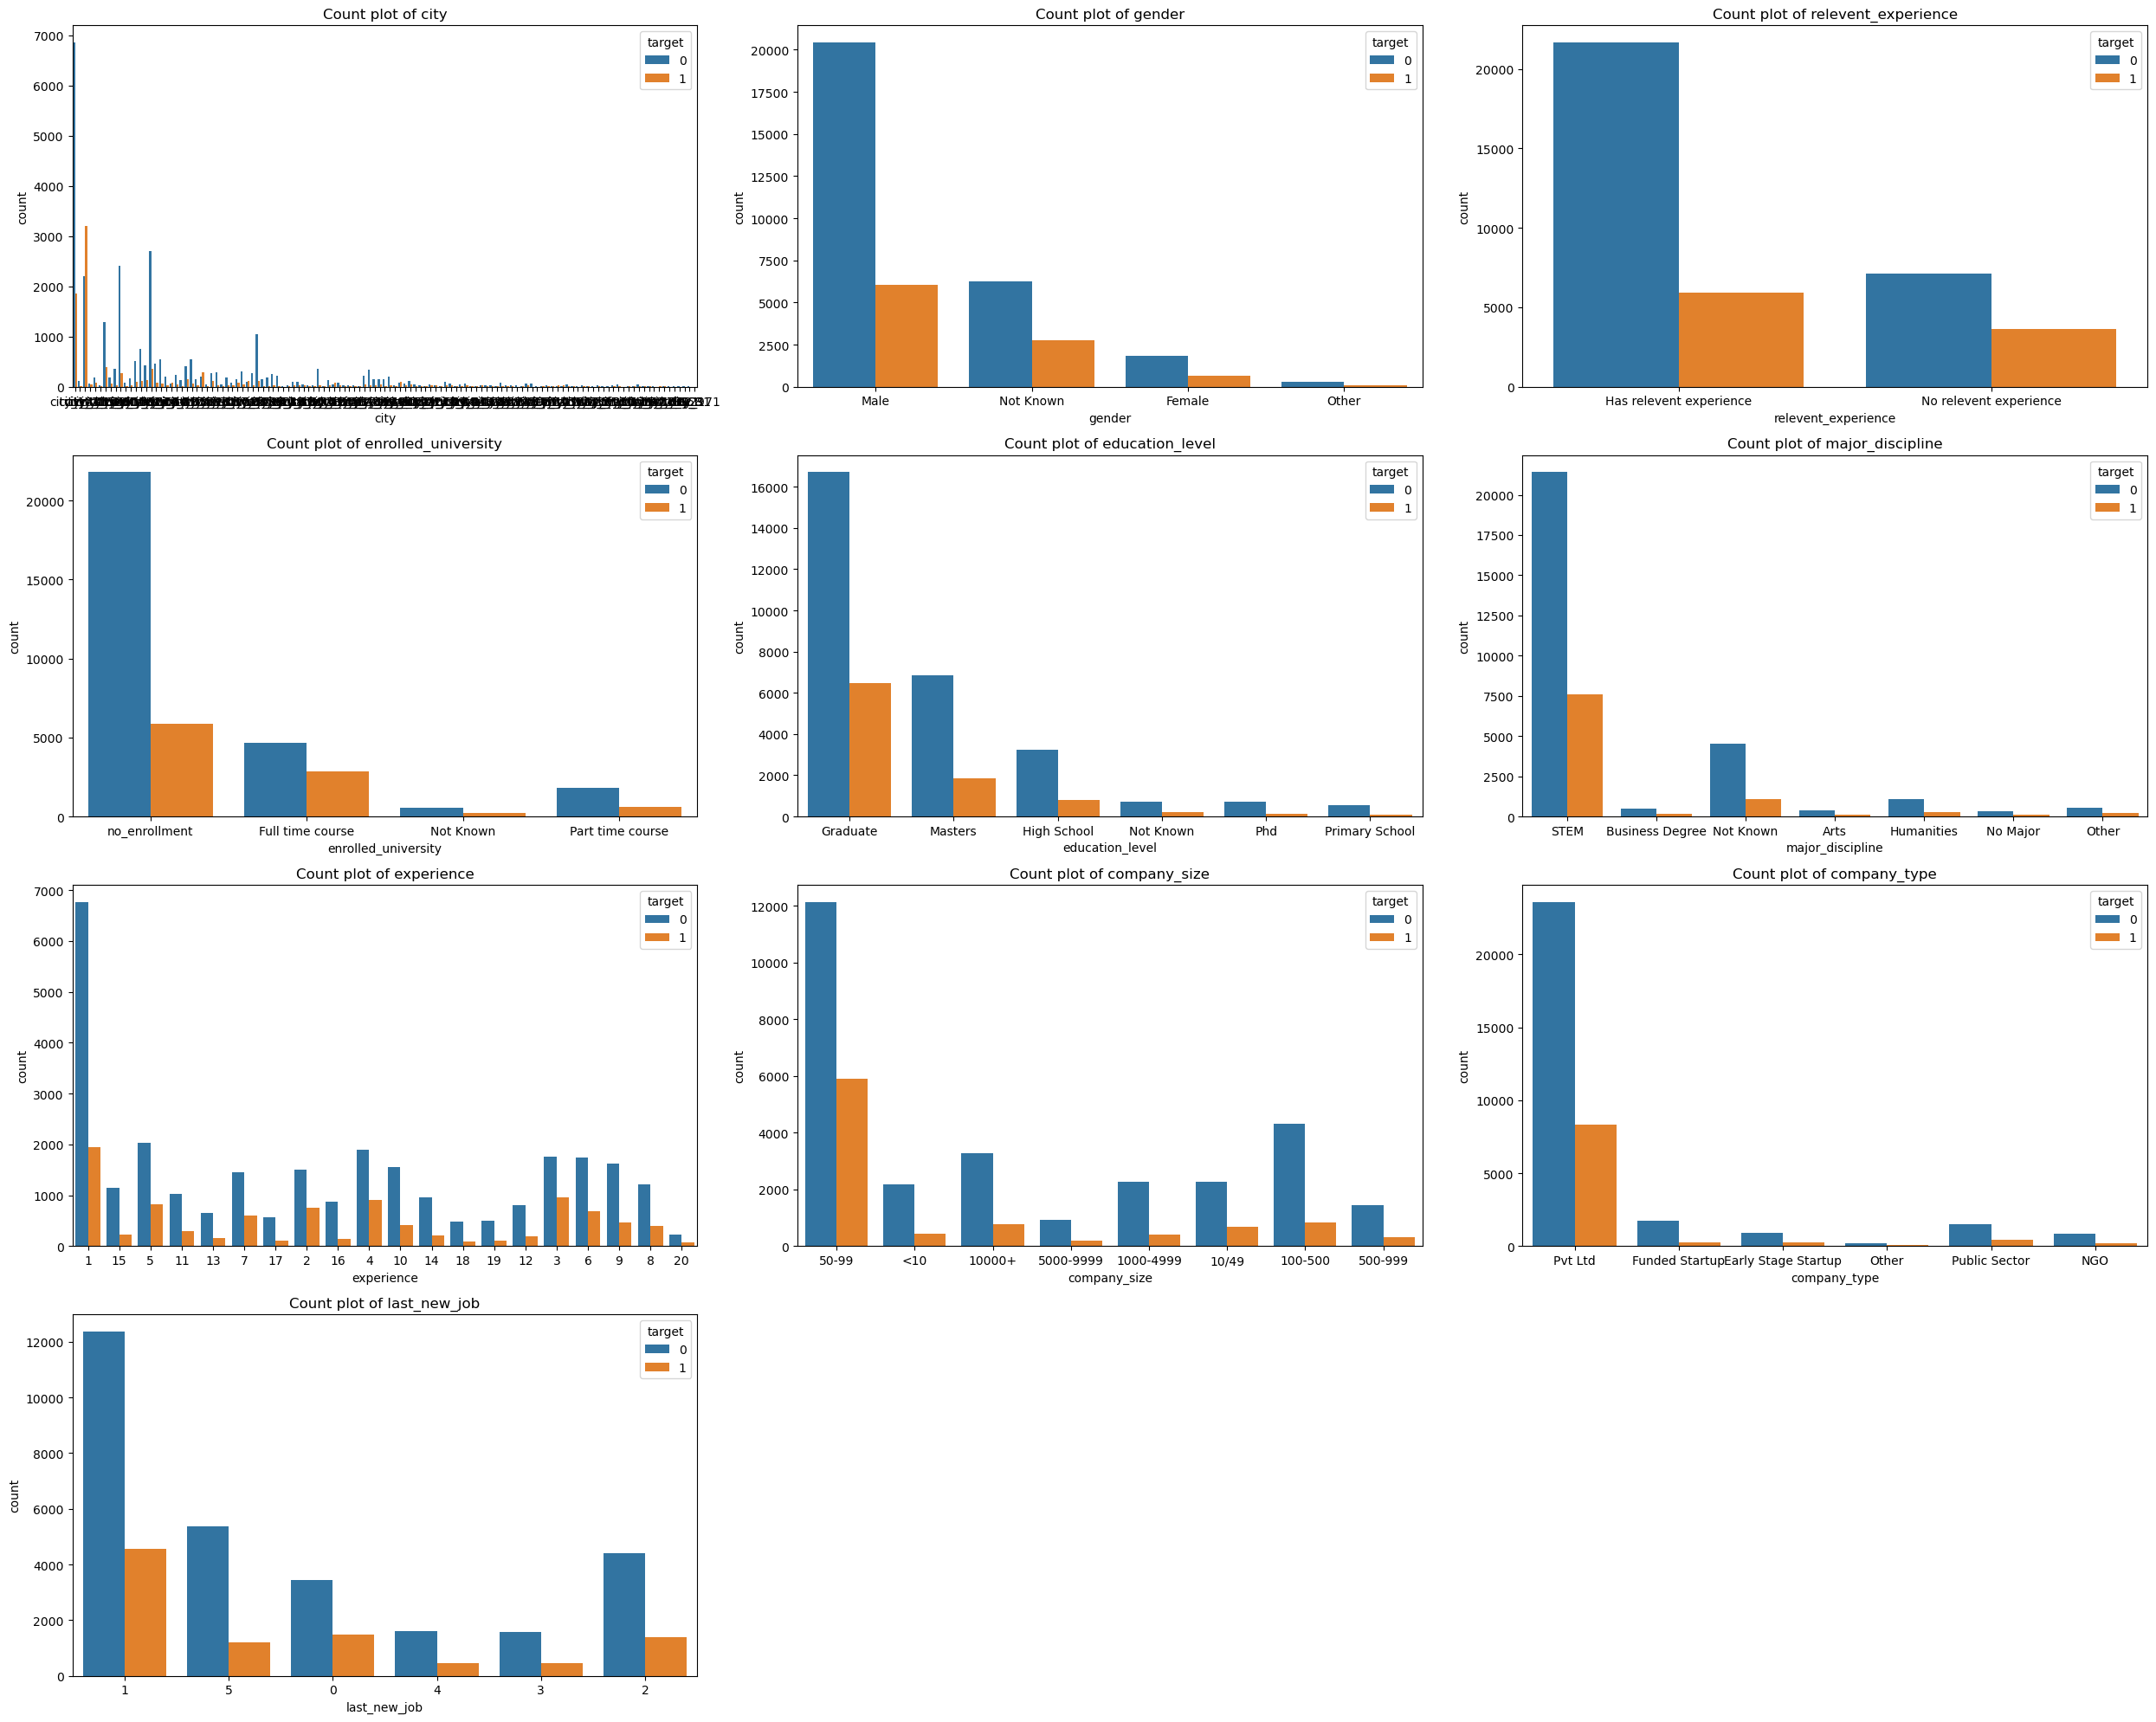

In [30]:
plt.figure(figsize=(25, 20))

for i in range(len(cat_feat)):
    plt.subplot(4, 3, i + 1)  # Create subplots (4,3 = grid size;i+1 = position of current sub plot)
    sns.countplot(x=cat_feat[i], data=df, hue='target')  # Set 'target' as the hue
    plt.title(f'Count plot of {cat_feat[i]}')

plt.tight_layout()  # Ensure subplots do not overlap
plt.show()

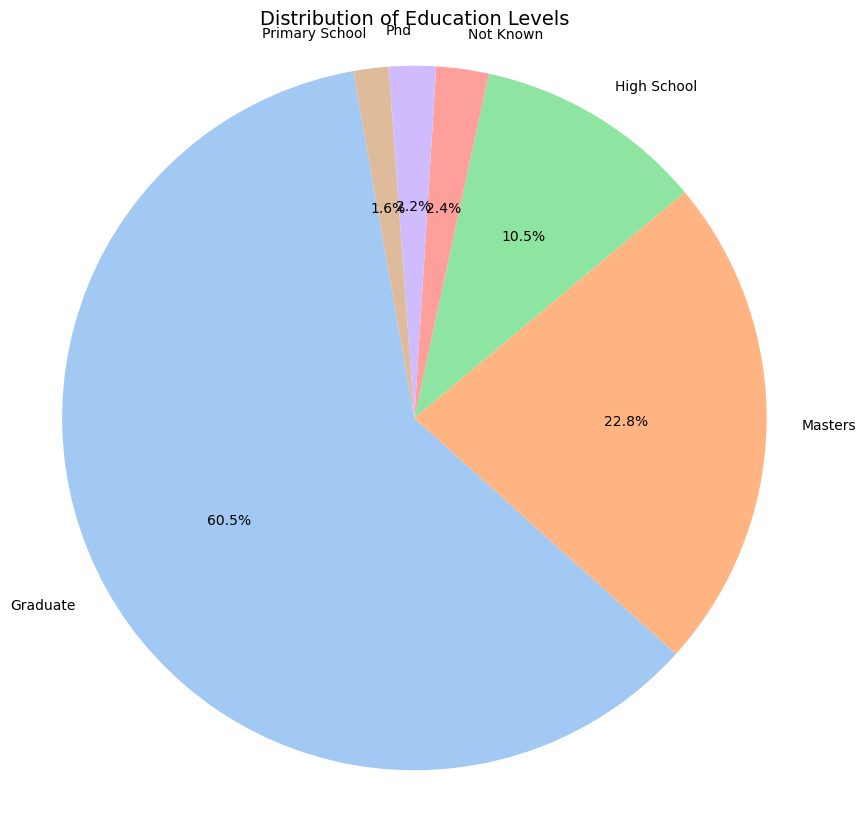

In [31]:
# Count occurrences of each education level
education_counts = df['education_level'].value_counts()

# Create the pie chart
plt.figure(figsize=(10, 10))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=100, colors=sns.color_palette('pastel'))

# Add a title
plt.title('Distribution of Education Levels', fontsize=14)

# Equal aspect ratio ensures the pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

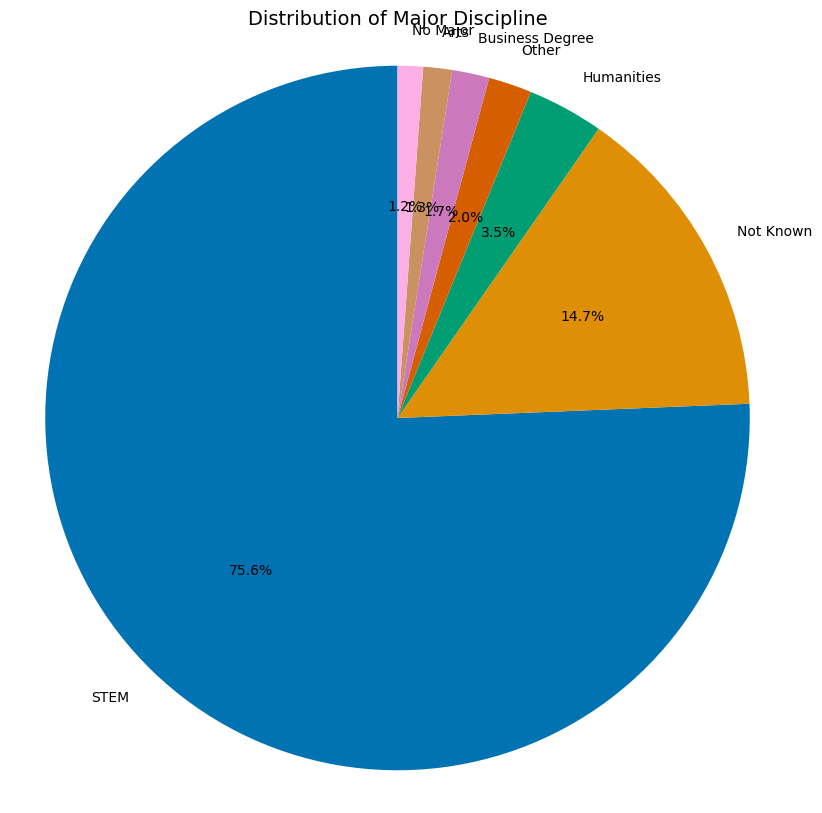

In [32]:
# Count occurrences of each major discipline
major_discipline_counts = df['major_discipline'].value_counts()

# Create the pie chart
plt.figure(figsize=(10, 10))
plt.pie(major_discipline_counts, labels=major_discipline_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('colorblind'))

# Add a title
plt.title('Distribution of Major Discipline', fontsize=14)

# Equal aspect ratio ensures the pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()